In [52]:
import numpy as np
import pandas as pd
import sys
import os

In [54]:
import sys
epddm_path = '/Users/hamishh/Documents/masters/code/masters_code'
sys.path.insert(0, os.path.abspath(epddm_path))

import EpDDM

# Some experiments with EPDDM

In [155]:
totals = []
for i in range(1000):
    total = 0
    total_n = 1000
    p = random.random()
    for i in range(total_n):
#        p = random.random()
        q = 1 - p
        e = p*p + q*q
        v = p*(p-e)**2 + q*(q-e)**2
        x = np.random.choice([p,q], p=[p,q])
        x = (x - e) / v
        total += x
    totals.append(total/total_n)

In [156]:
import matplotlib.pyplot as plt

In [165]:
totals_ = [ i for i in totals if np.abs(i) < 2 ]

(array([  1.,   1.,   1.,   0.,   1.,   0.,   1.,   2.,   3.,   2.,   4.,
          3.,   0.,   2.,   4.,   5.,   7.,  10.,  15.,  32.,  45.,  72.,
         94., 177., 148., 123.,  84.,  48.,  23.,  23.,  12.,  10.,   4.,
          3.,   2.,   0.,   2.,   4.,   0.,   1.,   0.,   1.,   0.,   1.,
          2.,   1.,   1.,   1.,   1.,   2.]),
 array([-1.85463808, -1.77817222, -1.70170636, -1.62524049, -1.54877463,
        -1.47230876, -1.3958429 , -1.31937704, -1.24291117, -1.16644531,
        -1.08997944, -1.01351358, -0.93704772, -0.86058185, -0.78411599,
        -0.70765012, -0.63118426, -0.55471839, -0.47825253, -0.40178667,
        -0.3253208 , -0.24885494, -0.17238907, -0.09592321, -0.01945735,
         0.05700852,  0.13347438,  0.20994025,  0.28640611,  0.36287197,
         0.43933784,  0.5158037 ,  0.59226957,  0.66873543,  0.7452013 ,
         0.82166716,  0.89813302,  0.97459889,  1.05106475,  1.12753062,
         1.20399648,  1.28046234,  1.35692821,  1.43339407,  1.50985994,
 

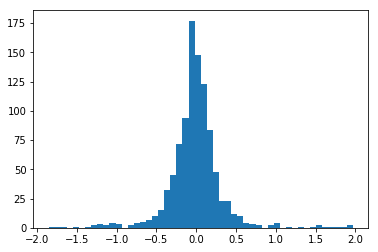

In [169]:
plt.hist(totals_, bins=50)

In [201]:
n_steps = 100
t = []
t_ = []

for i in range(1000):
    total = 0
    p = np.array([ random.random() for i in range(n_steps) ])
    p_ = np.array([ random.random() for i in range(n_steps) ])
    q = 1 - p
    q_ = 1 - p_
    e = p**2 + q**2
    x = np.array([ np.random.choice([p_i, q_i], p=[p_i, q_i]) for p_i, q_i in zip(p,q) ])
    x_ = np.array([ np.random.choice([p_i, q_i], p=[q_i, p_i]) for p_i, q_i in zip(p,q) ])
#    x_ = np.array([ np.random.choice([p_i, q_i], p=[p_i_, q_i_]) for p_i, q_i, p_i_, q_i_ in zip(p,q,p_,q_) ])
    x -= e
    x_ -= e
    t.append(np.abs(np.mean(x)))
    t_.append(np.abs(np.mean(x_)))
plt.hist(t)

IndentationError: expected an indented block (<ipython-input-201-fbf074de74b0>, line 15)

(array([  2.,  10.,  67., 162., 292., 258., 137.,  56.,  12.,   4.]),
 array([0.2057583 , 0.2315247 , 0.25729111, 0.28305752, 0.30882392,
        0.33459033, 0.36035674, 0.38612314, 0.41188955, 0.43765596,
        0.46342236]),
 <a list of 10 Patch objects>)

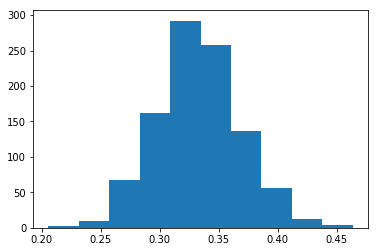

In [193]:
plt.hist(t_)

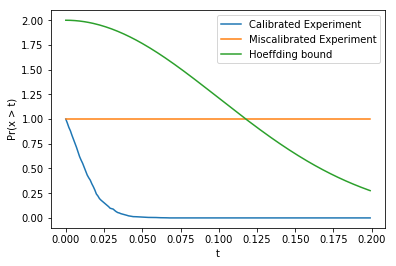

In [200]:
pr = []
x = np.arange(0, 0.2, 0.001)

for i in x:
    pr.append( len([j for j in t if j > i]) / len(t) )
plt.plot(x, pr, label='Calibrated Experiment')

pr_ = []
for i in x:
    pr_.append( len([j for j in t_ if j > i]) / len(t_) )
plt.plot(x, pr_, label='Miscalibrated Experiment')

y = 2 * np.exp( - 2 * n_steps**2* x**2 / n_steps / 4 )
plt.plot(x, y, label='Hoeffding bound')

plt.legend()
plt.xlabel(r't')
plt.ylabel('Pr(x > t)')
plt.show()

In [232]:
def get_x(p_func):
    # p is the predicted prob of true label
    # p_ is the real prob of true label
    p = random.random()
    p_ = p_func(p)
    q = 1 - p
    e = p*p + q*q
    x = np.random.choice([p,q], p=[p_,1-p_])
    return (x - e)

def calibrated_p(p):
    return p
    
def half_p(p):
    return p / 2

def invert_p(p):
    return 1 - p

def resample_p(p):
    return random.random()

p_generators = ['calibrated_p', 'half_p', 'invert_p', 'resample_p']

t_vals = {p_gen: [] for p_gen in p_generators}

no_samples = 1000
no_trials = 1000

for p_gen in p_generators:
    for trial_i in range(no_trials):
        total = 0
        means = [0]
        for sample_i in range(no_samples):
            total += get_x(eval(p_gen))
            means.append(total / (sample_i+1))
        t_vals[p_gen].append(np.abs(means))

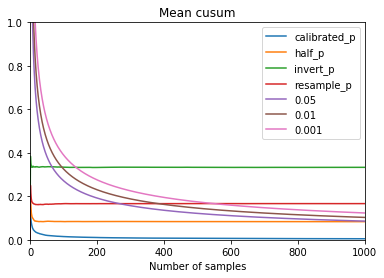

In [241]:
for p_gen, ts in t_vals.items():
    means = []
    for i in range(len(ts[0])):
        means.append( np.mean([ts[j][i] for j in range(len(ts))]) )
    plt.plot(range(len(ts[0])), means, label=p_gen)
    
for threshold in [0.05, 0.01, 0.001]:
    n = range(1, no_trials)
    t = np.sqrt( -2*np.log(threshold/2)/n )
    plt.plot(n, t, label=f'Pr < {threshold}')
    
plt.legend()
plt.title('Mean cusum')
plt.xlabel('Number of samples')
plt.xlim([0,1000])
plt.ylim([0,1])
plt.show()

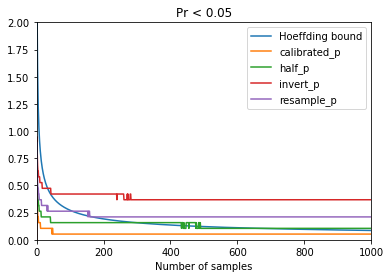

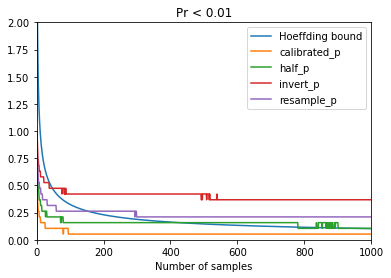

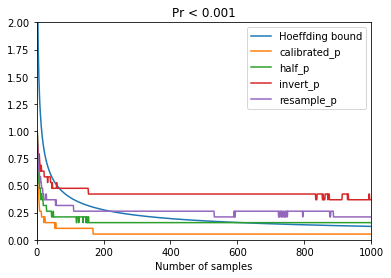

In [240]:
for threshold in [0.05, 0.01, 0.001]:
    plt.title(f'Pr < {threshold}')
    n = range(1, no_trials)
    t = np.sqrt( -2*np.log(threshold/2)/n )
    plt.plot(n, t, label='Hoeffding bound')
    
    for p_gen, ts in t_vals.items():
        t_thresholds = []
        for i in range(len(ts[0])):
            for t in np.linspace(0, 1, 20):
                if len([j for j in range(len(ts)) if ts[j][i] > t ]) / len(ts) < threshold:
                    t_thresholds.append(t)
                    break
        plt.plot(range(len(t_thresholds)), t_thresholds, label=p_gen)

    plt.xlabel('Number of samples')
    plt.xlim([0,1000])
    plt.ylim([0,2])
    plt.legend()
    plt.show()

# Experiments where EPDDM should improve performance

In [18]:
def generate_data(n_samples, p):
    # p = [ Pr(y=1|x=0), Pr(y=1|x=1) ]
    x = [ np.random.choice(2) for i in range(n_samples) ]
    y = [ np.random.choice(2, p=[1-p[i], p[i]]) for i in x ]

    return x, y

x,y = generate_data(20, [0.5, 1.0])
pd.DataFrame({'x':x, 'y':y})

,x,y
0,1,1
1,0,1
2,1,1
3,1,1
4,1,1
5,1,1
6,0,0
7,0,0
8,0,0
9,1,1


# Experiment 1: False Positive Rate for Noisy Data

EPDDM should have a lower false positive rate with noisy data.

We have the following:
 * $x$ and $y$ are binary variables
 * $\Pr(x=0)=0.5$
 * $\Pr(y=1|x=0)=0.5$
 * $\Pr(y=1|x=1)=1.0$

In [5]:
import sys
epddm_path = '/Users/hamishh/Documents/masters/code/masters_code'
sys.path.insert(0, os.path.abspath(epddm_path))

from EpDDM import EpDDM

In [6]:
import EpDDM

In [65]:
from importlib import reload
EpDDM = reload(EpDDM)

In [66]:
import warnings
warnings.filterwarnings('ignore')

In [43]:
class simpleModel:
    def __init__(self):
        self.counts = { 0: np.array([1,1]), 1: np.array([1,1])}
    def partial_fit(self, x, y, classes=None):
        for x_, y_ in zip(x, y):
            self.counts[x_[0]][y_] += 1
        return self
    def predict_proba(self, x):
        ret = []
        for x_ in x:
            x_ = x_[0]
            ret.append( self.counts[x_]/np.sum(self.counts[x_]) )
        ret = np.array(ret)
        return ret
    def predict(self, x):
        probs = self.predict_proba(x)
        ret = [ max([0,1], key=lambda x: line[x]) for line in probs ]
        return ret

In [74]:
Model = simpleNB # MultinomialNB

def run_experiment(x, y):
    # To fit the Naive Bayes format
    x = np.array(x).reshape(-1, 1)
    
    n_head_start = 100

    model = Model()
    model2 = Model()
    model.partial_fit(x[0: n_head_start], y[0: n_head_start], classes=[0,1])
    model2.partial_fit(x[0: n_head_start], y[0: n_head_start], classes=[0,1])

    ddm = DDM()
    epddm = EpDDM.EpDDM()

    res_list = []
    res_list2 = []
    warning_list = []
    drift_list = []

    current_list = []

    x_buffer = []
    y_buffer = []

    detection_list = []
    detection_list2 = []

    for i in range(n_head_start, len(x)):

        y_ = y[i: i+1]
        x_ = x[i: i+1]

        y_hat = model.predict(x_)
        res = bool(y_ != y_hat) # residual
        res_list.append(res)

        model = model.partial_fit(x_, y_)

        # Update DDM
        ddm.add_element(res)

        warning_level = ddm.miss_prob_min + ddm.warning_level * ddm.miss_sd_min
        drift_level = ddm.miss_prob_min + ddm.out_control_level * ddm.miss_sd_min

        current_level = ddm.miss_prob + ddm.miss_std

        warning_list.append(warning_level)
        drift_list.append(drift_level)
        current_list.append(current_level)

        # Check for drift/warning
        if ddm.detected_warning_zone():
            if not prev_warning:
                # reset buffer
                x_buffer = []
                y_buffer = []
            x_buffer.append(x_[0])
            y_buffer.append(y_[0])
        else:
            prev_warning = False

        if ddm.detected_change():
            model = Model()
            model.partial_fit(x_buffer, y_buffer, classes=[1,2,3,4,5])
            ddm.reset()
            detection_list.append(i)

        # Update EpDDM
        probs = model.predict_proba(x_)[0]

        y_hat = model2.predict(x_)
        res = bool(y_ != y_hat) # residual
        res_list2.append(res)
        
        model2 = model2.partial_fit(x_, y_)

        #print(x_[0][0], probs, y_[0])
        #print(y_[0], x_[0][0])
        
        epddm.update(probs, y_[0], x_[0][0])
        
        model2_retrain = epddm.needs_retrain()
        #print(model2_retrain)
        #print(epddm.hoeffding_bounds)
        if model2_retrain:
            retrain_x, retrain_y = model2_retrain
            retrain_x = np.array(retrain_x).reshape((-1,1))
            model2 = Model()
            model2.partial_fit(retrain_x, retrain_y, classes=[0,1])
            detection_list2.append(i)
            epddm = EpDDM.EpDDM()
            
    results = pd.DataFrame({'no_detections':[len(detection_list), len(detection_list2)],
                       'err_rate': [np.mean(res_list), np.mean(res_list2)]})
    results.index = ['DDM', 'EPDDM']
    display(results)
    return detection_list, detection_list2

In [ ]:


def run_experiment2(x, y):
    # To fit the Naive Bayes format
    x = np.array(x).reshape(-1, 1)
    
    n_head_start = 100
    
    Model = simpleModel # MultinomialNB
    
    results = pd.DataFrame({'no_detections':[len(detection_list), len(detection_list2)],
                       'err_rate': [np.mean(res_list), np.mean(res_list2)]})
    
    for ddm_str in 'DDM EpDDM.EpDDM'.split():
        
        ddm = eval(ddm_str + '()')
        model = Model()
        model.partial_fit(x[0: n_head_start], y[0: n_head_start], classes=[0,1])

        res_list = []
        res_list2 = []
        warning_list = []
        drift_list = []

        current_list = []

        x_buffer = []
        y_buffer = []

        detection_list = []
        detection_list2 = []

        for i in range(n_head_start, len(x)):

            y_ = y[i: i+1]
            x_ = x[i: i+1]

            y_hat = model.predict(x_)
            res = bool(y_ != y_hat) # residual
            res_list.append(res)

            model = model.partial_fit(x_, y_)

            # Update DDM
            ddm.add_element(res)

            warning_level = ddm.miss_prob_min + ddm.warning_level * ddm.miss_sd_min
            drift_level = ddm.miss_prob_min + ddm.out_control_level * ddm.miss_sd_min

            current_level = ddm.miss_prob + ddm.miss_std

            warning_list.append(warning_level)
            drift_list.append(drift_level)
            current_list.append(current_level)

            # Check for drift/warning
            if ddm.detected_warning_zone():
                if not prev_warning:
                    # reset buffer
                    x_buffer = []
                    y_buffer = []
                x_buffer.append(x_[0])
                y_buffer.append(y_[0])
            else:
                prev_warning = False

            if ddm.detected_change():
                model = Model()
                model.partial_fit(x_buffer, y_buffer, classes=[1,2,3,4,5])
                ddm.reset()
                detection_list.append(i)

            # Update EpDDM
            probs = model.predict_proba(x_)[0]

            y_hat = model2.predict(x_)
            res = bool(y_ != y_hat) # residual
            res_list2.append(res)

            model2 = model2.partial_fit(x_, y_)

            #print(x_[0][0], probs, y_[0])
            #print(y_[0], x_[0][0])

            epddm.update(probs, y_[0], x_[0][0])

            model2_retrain = epddm.needs_retrain()
            #print(model2_retrain)
            #print(epddm.hoeffding_bounds)
            if model2_retrain:
                retrain_x, retrain_y = model2_retrain
                retrain_x = np.array(retrain_x).reshape((-1,1))
                model2 = Model()
                model2.partial_fit(retrain_x, retrain_y, classes=[0,1])
                detection_list2.append(i)
                epddm = EpDDM.EpDDM()
            
    results = pd.DataFrame({'no_detections':[len(detection_list), len(detection_list2)],
                       'err_rate': [np.mean(res_list), np.mean(res_list2)]})
    results.index = ['DDM', 'EPDDM']
    display(results)
    return detection_list, detection_list2

In [78]:
x, y = generate_data(1000000, [0.5, 1.0])
run_experiment(x, y)

,no_detections,err_rate
DDM,0,0.249911
EPDDM,0,0.249911


([], [])

# Experiment 2: Detection Delay for Reversals in Highly Predictable Labels

EPDDM should be much faster to detect changes in formerly highly predictable labels.

Concept 1:
 * $\Pr(y=1|x=0) = 0.5$
 * $\Pr(y=1|x=1) = 1.0$
 
Concept 2:
 * $\Pr(y=1|x=0) = 0.5$
 * $\Pr(y=1|x=1) = 0.0$

In [76]:
x1, y1 = generate_data(10000, [0.5, 1.0])
x2, y2 = generate_data(10000, [0.5, 0.0])
x = x1
x.extend(x2)
y = y1
y.extend(y2)
run_experiment(x, y)

,no_detections,err_rate
DDM,1,0.254271
EPDDM,19,0.248291


([10225],
 [10013,
  10020,
  10030,
  10040,
  10051,
  10060,
  10070,
  10080,
  10095,
  10106,
  10122,
  10133,
  10143,
  10155,
  10164,
  10175,
  10186,
  10204,
  10221])

# Experiment 3: Moving Noise Around

If noise is shifted from one region of instance space to another, then this change will be undetectable if you are only monitoring the error rate. However, it should be detectabel to EPDDM.

Concept 1:
 * $\Pr(y=1|x=0) = 0.6$
 * $\Pr(y=1|x=1) = 0.9$
 
Concept 2:
 * $\Pr(y=1|x=0) = 0.9$
 * $\Pr(y=1|x=1) = 0.6$

In [77]:
x1, y1 = generate_data(10000, [0.6, 0.9])
x2, y2 = generate_data(10000, [0.9, 0.6])
x = x1
x.extend(x2)
y = y1
y.extend(y2)
run_experiment(x, y)

,no_detections,err_rate
DDM,1,0.251910
EPDDM,12,0.254472


([164],
 [10196,
  10269,
  10461,
  10636,
  10925,
  11299,
  11468,
  11772,
  12124,
  13226,
  13287,
  14307])

# Using Tornado

In [11]:
import sys
import os
tornado_path = os.path.abspath('../tornado')
sys.path.insert(0, tornado_path)

The project path "projects/multi/sine1/20191002_165644/" is created.
NB + FHDDM [0.1425, 32.592, 663.1854563747765] [182, [80047, 4], 0, 0, 1.768, 64.31689724558964]
NB + FHDDMS [0.1421, 32.592, 587.801089102868] [148, [80037, 4], 0, 0, 1.944, 233.43656717042904]
NB + CUSUM [0.1421, 32.592, 549.7620950627606] [343, [80098, 4], 0, 0, 0.896, 60.281254118308425]
NB + PageHinkley [0.1412, 32.592, 543.8366378366482] [975, [60242, 2], 2, 2, 0.976, 40.9612132498296]
NB + DDM [0.1409, 32.592, 546.041649140534] [617, [80171, 4], 0, 0, 0.92, 72.014856574242]
NB + EDDM [0.1393, 32.592, 527.4742968031205] [1000, [0, 0], 7, 4, 1.48, 27.226588339544833]
NB + ADWIN [0.1476, 32.592, 390.34913065552246] [274, [80073, 4], 6, 0, 10.552, 289.44917021726724]
NB + SeqDrift2 [0.1403, 32.592, 542.2673979919637] [808, [80205, 4], 1, 0, 664.376, 184.42155941738747]
NB + HDDM.A.test [0.1425, 32.592, 559.9508127634181] [213, [80046, 4], 1, 0, 1.312, 211.20663109468296]
NB + HDDM.W.test [0.1419, 32.592, 557.411943

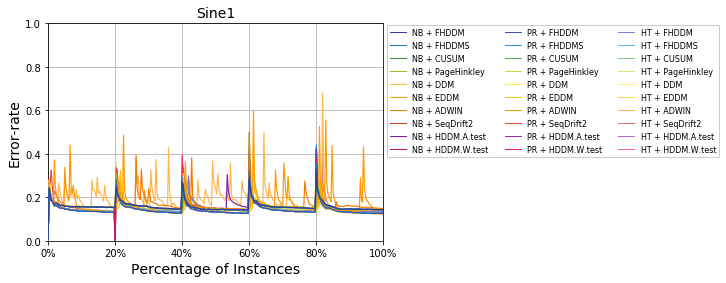

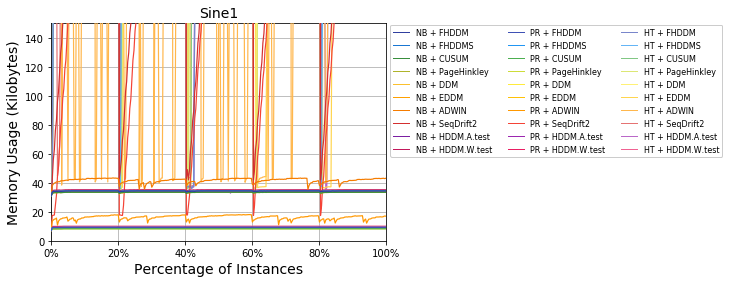

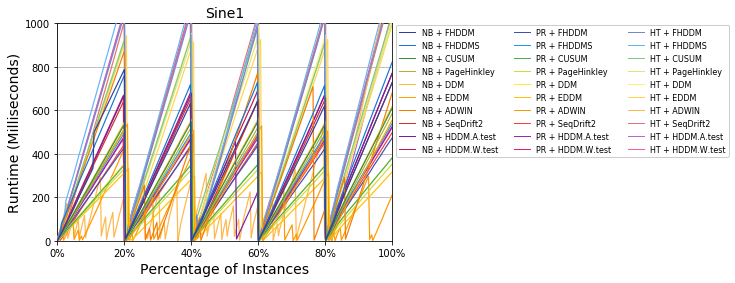

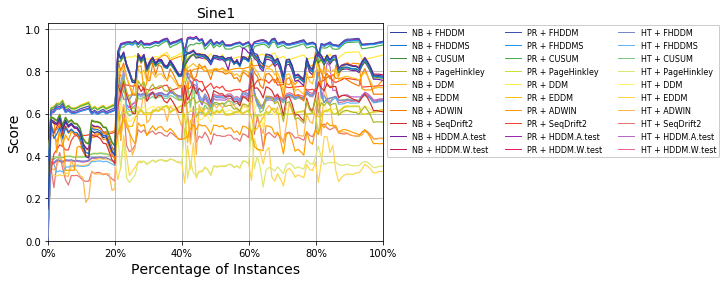

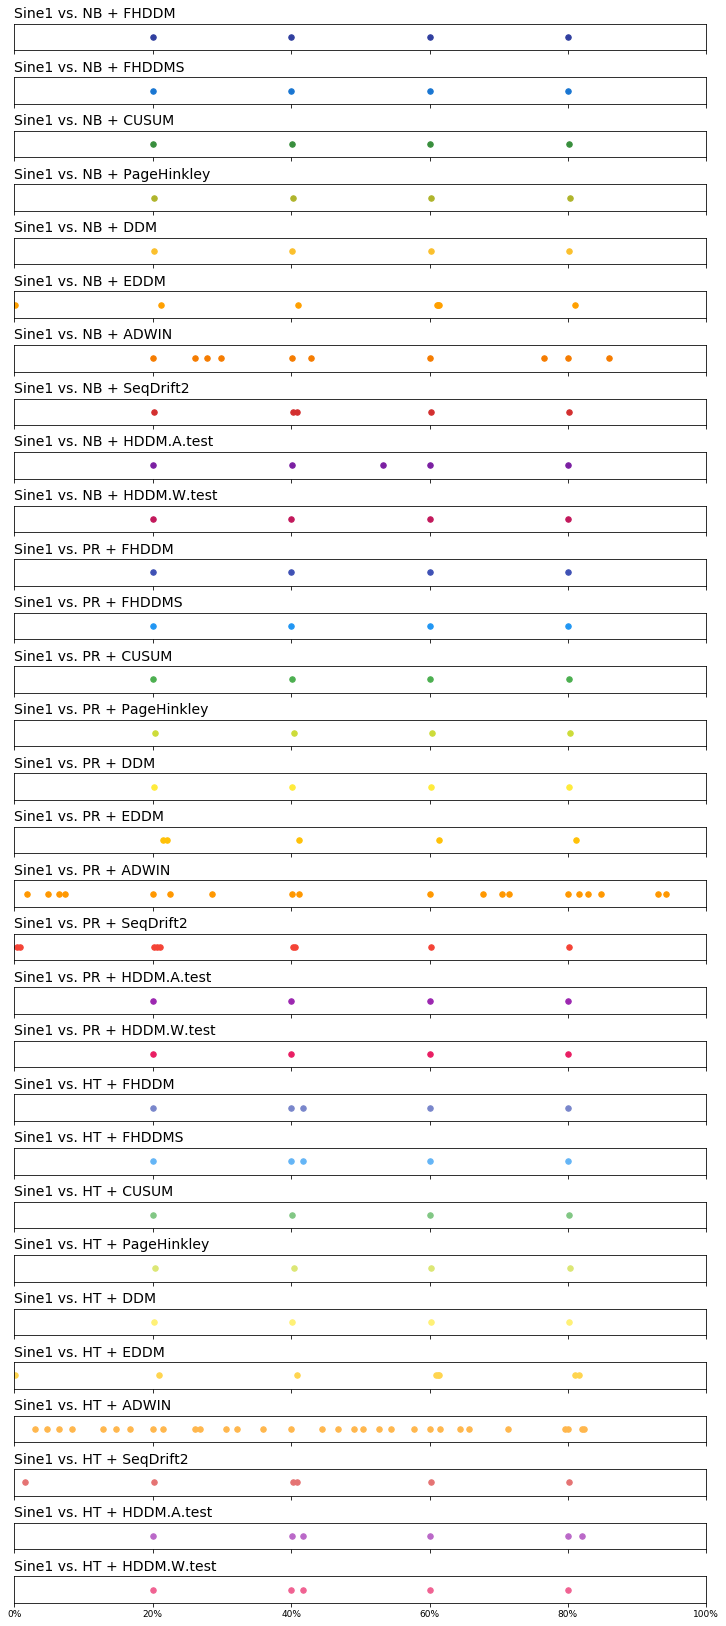

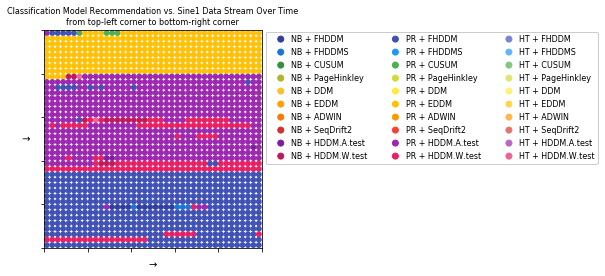

In [13]:
# Test
from data_structures.attribute_scheme import AttributeScheme
from classifier.__init__ import *
from drift_detection.__init__ import *
from filters.project_creator import Project
from graphic.hex_colors import Color
from streams.readers.arff_reader import ARFFReader
from tasks.prequential_learner_detector_pairs import PrequentialMultiPairs

# 1. Creating a project
project = Project("projects/multi", "sine1")

# 2. Loading an arff file
labels, attributes, stream_records = ARFFReader.read(tornado_path + "/data_streams/sine1_w_50_n_0.1/sine1_w_50_n_0.1_101.arff")
attributes_scheme = AttributeScheme.get_scheme(attributes)

# 3. Initializing a Classifier-Detector Pairs
pairs = [[NaiveBayes(labels, attributes_scheme['nominal']), FHDDM()],
         [NaiveBayes(labels, attributes_scheme['nominal']), FHDDMS()],
         [NaiveBayes(labels, attributes_scheme['nominal']), CUSUM()],
         [NaiveBayes(labels, attributes_scheme['nominal']), PH()],
         [NaiveBayes(labels, attributes_scheme['nominal']), DDM()],
         [NaiveBayes(labels, attributes_scheme['nominal']), EDDM()],
         [NaiveBayes(labels, attributes_scheme['nominal']), ADWINChangeDetector()],
         [NaiveBayes(labels, attributes_scheme['nominal']), SeqDrift2ChangeDetector()],
         [NaiveBayes(labels, attributes_scheme['nominal']), HDDM_A_test()],
         [NaiveBayes(labels, attributes_scheme['nominal']), HDDM_W_test()],
         [Perceptron(labels, attributes_scheme['numeric']), FHDDM()],
         [Perceptron(labels, attributes_scheme['numeric']), FHDDMS()],
         [Perceptron(labels, attributes_scheme['numeric']), CUSUM()],
         [Perceptron(labels, attributes_scheme['numeric']), PH()],
         [Perceptron(labels, attributes_scheme['numeric']), DDM()],
         [Perceptron(labels, attributes_scheme['numeric']), EDDM()],
         [Perceptron(labels, attributes_scheme['numeric']), ADWINChangeDetector()],
         [Perceptron(labels, attributes_scheme['numeric']), SeqDrift2ChangeDetector()],
         [Perceptron(labels, attributes_scheme['numeric']), HDDM_A_test()],
         [Perceptron(labels, attributes_scheme['numeric']), HDDM_W_test()],
         [HoeffdingTree(labels, attributes_scheme['nominal']), FHDDM()],
         [HoeffdingTree(labels, attributes_scheme['nominal']), FHDDMS()],
         [HoeffdingTree(labels, attributes_scheme['nominal']), CUSUM()],
         [HoeffdingTree(labels, attributes_scheme['nominal']), PH()],
         [HoeffdingTree(labels, attributes_scheme['nominal']), DDM()],
         [HoeffdingTree(labels, attributes_scheme['nominal']), EDDM()],
         [HoeffdingTree(labels, attributes_scheme['nominal']), ADWINChangeDetector()],
         [HoeffdingTree(labels, attributes_scheme['nominal']), SeqDrift2ChangeDetector()],
         [HoeffdingTree(labels, attributes_scheme['nominal']), HDDM_A_test()],
         [HoeffdingTree(labels, attributes_scheme['nominal']), HDDM_W_test()]]

# 4. Creating a color set for plotting results
colors = [Color.Indigo[1], Color.Blue[1], Color.Green[1], Color.Lime[1], Color.Yellow[1],
          Color.Amber[1], Color.Orange[1], Color.Red[1], Color.Purple[1], Color.Pink[1],
          Color.Indigo[2], Color.Blue[2], Color.Green[2], Color.Lime[2], Color.Yellow[2],
          Color.Amber[2], Color.Orange[2], Color.Red[2], Color.Purple[2], Color.Pink[2],
          Color.Indigo[3], Color.Blue[3], Color.Green[3], Color.Lime[3], Color.Yellow[3],
          Color.Amber[3], Color.Orange[3], Color.Red[3], Color.Purple[3], Color.Pink[3]]

# 5. Defining actual locations of drifts, acceptance delay interval, and vector of weights
actual_drift_points = [20000, 40000, 60000, 80000]
drift_acceptance_interval = 250
w_vec = [1, 1, 1, 1, 1, 1]

# 6. Creating a Prequential Evaluation Process
prequential = PrequentialMultiPairs(pairs, attributes, attributes_scheme,
                                    actual_drift_points, drift_acceptance_interval,
                                    w_vec, project, color_set=colors, legend_param=False)

prequential.run(stream_records, 1)

In [30]:
def make_arff(x, y, fname):
    to_write = '''@relation SINE1
@attribute x integer
@attribute class {p,n}

@data
'''
    for x_, y_ in zip(x, y):
        y_ = 'p' if y_ else 'n'
        to_write += f'{x_},{y_}\n'
    with open(fname, 'w') as f:
        f.write(to_write)

In [31]:
x1, y1 = generate_data(100, [0.5, 1.0])
x2, y2 = generate_data(100, [0.5, 0.0])
x = x1
x.extend(x2)
y = y1
y.extend(y2)


In [39]:
def test_drift_detectors(x, y, fname):
    make_arff(x, y, fname)

    # 1. Creating a project
    project = Project("projects/multi", "sine1")

    # 2. Loading an arff file
    labels, attributes, stream_records = ARFFReader.read(fname)
    attributes_scheme = AttributeScheme.get_scheme(attributes)

    # 3. Initializing a Classifier-Detector Pairs
    pairs = [[NaiveBayes(labels, attributes_scheme['nominal']), FHDDM()],
             [NaiveBayes(labels, attributes_scheme['nominal']), FHDDMS()],
             [NaiveBayes(labels, attributes_scheme['nominal']), CUSUM()],
             [NaiveBayes(labels, attributes_scheme['nominal']), PH()],
             [NaiveBayes(labels, attributes_scheme['nominal']), DDM()],
             [NaiveBayes(labels, attributes_scheme['nominal']), EDDM()],
             [NaiveBayes(labels, attributes_scheme['nominal']), ADWINChangeDetector()],
             [NaiveBayes(labels, attributes_scheme['nominal']), SeqDrift2ChangeDetector()],
             [NaiveBayes(labels, attributes_scheme['nominal']), HDDM_A_test()],
             [NaiveBayes(labels, attributes_scheme['nominal']), HDDM_W_test()],
             [Perceptron(labels, attributes_scheme['numeric']), FHDDM()],
             [Perceptron(labels, attributes_scheme['numeric']), FHDDMS()],
             [Perceptron(labels, attributes_scheme['numeric']), CUSUM()],
             [Perceptron(labels, attributes_scheme['numeric']), PH()],
             [Perceptron(labels, attributes_scheme['numeric']), DDM()],
             [Perceptron(labels, attributes_scheme['numeric']), EDDM()],
             [Perceptron(labels, attributes_scheme['numeric']), ADWINChangeDetector()],
             [Perceptron(labels, attributes_scheme['numeric']), SeqDrift2ChangeDetector()],
             [Perceptron(labels, attributes_scheme['numeric']), HDDM_A_test()],
             [Perceptron(labels, attributes_scheme['numeric']), HDDM_W_test()],
             [HoeffdingTree(labels, attributes_scheme['nominal']), FHDDM()],
             [HoeffdingTree(labels, attributes_scheme['nominal']), FHDDMS()],
             [HoeffdingTree(labels, attributes_scheme['nominal']), CUSUM()],
             [HoeffdingTree(labels, attributes_scheme['nominal']), PH()],
             [HoeffdingTree(labels, attributes_scheme['nominal']), DDM()],
             [HoeffdingTree(labels, attributes_scheme['nominal']), EDDM()],
             [HoeffdingTree(labels, attributes_scheme['nominal']), ADWINChangeDetector()],
             [HoeffdingTree(labels, attributes_scheme['nominal']), SeqDrift2ChangeDetector()],
             [HoeffdingTree(labels, attributes_scheme['nominal']), HDDM_A_test()],
             [HoeffdingTree(labels, attributes_scheme['nominal']), HDDM_W_test()]]

    # 4. Creating a color set for plotting results
    colors = [Color.Indigo[1], Color.Blue[1], Color.Green[1], Color.Lime[1], Color.Yellow[1],
              Color.Amber[1], Color.Orange[1], Color.Red[1], Color.Purple[1], Color.Pink[1],
              Color.Indigo[2], Color.Blue[2], Color.Green[2], Color.Lime[2], Color.Yellow[2],
              Color.Amber[2], Color.Orange[2], Color.Red[2], Color.Purple[2], Color.Pink[2],
              Color.Indigo[3], Color.Blue[3], Color.Green[3], Color.Lime[3], Color.Yellow[3],
              Color.Amber[3], Color.Orange[3], Color.Red[3], Color.Purple[3], Color.Pink[3]]

    # 5. Defining actual locations of drifts, acceptance delay interval, and vector of weights
    actual_drift_points = [500]
    drift_acceptance_interval = 250
    w_vec = [1]

    # 6. Creating a Prequential Evaluation Process
    prequential = PrequentialMultiPairs(pairs, attributes, attributes_scheme,
                                        actual_drift_points, drift_acceptance_interval,
                                        w_vec, project, color_set=colors, legend_param=False)

    prequential.run(stream_records, 1)

In [41]:
def test_epddm(x, y):
    # To fit the Naive Bayes format
    x = np.array(x).reshape(-1, 1)
    
    n_head_start = 100
    
    Model = simpleModel # MultinomialNB
    
    results = pd.DataFrame({'no_detections':[len(detection_list), len(detection_list2)],
                       'err_rate': [np.mean(res_list), np.mean(res_list2)]})
    
    for ddm_str in 'EpDDM.EpDDM'.split(' '):
        
        ddm = eval(ddm_str + '()')
        model = Model()
        model.partial_fit(x[0: n_head_start], y[0: n_head_start], classes=[0,1])

        res_list = []
        res_list2 = []
        warning_list = []
        drift_list = []

        current_list = []

        x_buffer = []
        y_buffer = []

        detection_list = []

        for i in range(n_head_start, len(x)):

            y_ = y[i: i+1]
            x_ = x[i: i+1]

            y_hat = model.predict(x_)
            res = bool(y_ != y_hat) # residual
            res_list.append(res)

            model = model.partial_fit(x_, y_)

            # Update EpDDM
            probs = model.predict_proba(x_)[0]

            y_hat = model2.predict(x_)
            res = bool(y_ != y_hat) # residual
            res_list2.append(res)

            model2 = model2.partial_fit(x_, y_)

            #print(x_[0][0], probs, y_[0])
            #print(y_[0], x_[0][0])

            epddm.update(probs, y_[0], x_[0][0])

            model2_retrain = epddm.needs_retrain()
            #print(model2_retrain)
            #print(epddm.hoeffding_bounds)
            if model2_retrain:
                retrain_x, retrain_y = model2_retrain
                retrain_x = np.array(retrain_x).reshape((-1,1))
                model2 = Model()
                model2.partial_fit(retrain_x, retrain_y, classes=[0,1])
                detection_list2.append(i)
                epddm = EpDDM.EpDDM()
            
    results = pd.DataFrame({'no_detections':[len(detection_list), len(detection_list2)],
                       'err_rate': [np.mean(res_list), np.mean(res_list2)]})
    results.index = ['DDM', 'EPDDM']
    display(results)
    return detection_list, detection_list2

In [64]:
Model = simpleModel # MultinomialNB

def test_epddm(x, y):
    # To fit the Naive Bayes format
    x = np.array(x).reshape(-1, 1)
    
    n_head_start = 100

    model = Model()
    model.partial_fit(x[0: n_head_start], y[0: n_head_start], classes=[0,1])

    ddm = DDM()
    epddm = EpDDM.EpDDM()

    res_list = []

    current_list = []

    x_buffer = []
    y_buffer = []

    detection_list = []

    for i in range(n_head_start, len(x)):

        y_ = y[i: i+1]
        x_ = x[i: i+1]

        probs = model.predict_proba(x_)[0]
        
        y_hat = model.predict(x_)[0]
        print(y_, y_hat)
        res = bool(y_[0] != y_hat) # residual
        res_list.append(res)

        model = model.partial_fit(x_, y_)

        # Update EpDDM
        epddm.update(probs, y_, x_[0][0])
        
        model2_retrain = epddm.needs_retrain()
        if model2_retrain:
            retrain_x, retrain_y = model2_retrain
            retrain_x = np.array(retrain_x).reshape((-1,1))
            model2 = Model()
            model2.partial_fit(retrain_x, retrain_y, classes=[0,1])
            detection_list.append(i)
            epddm = EpDDM.EpDDM()
            
    results = pd.DataFrame({'no_detections':[len(detection_list)],
                       'err_rate': [np.mean(res_list)]})
    results.index = ['EPDDM']
    display(results)
    return detection_list

# Experiment 1: False Positive Rate for Noisy Data

EPDDM should have a lower false positive rate with noisy data.

We have the following:
 * $x$ and $y$ are binary variables
 * $\Pr(x=0)=0.5$
 * $\Pr(y=1|x=0)=0.5$
 * $\Pr(y=1|x=1)=1.0$

In [65]:
x, y = generate_data(10000, [0.5, 1.0])
test_epddm(x, y)

[0] 0


ValueError: all the input arrays must have same number of dimensions

In [ ]:
test_drift_detectors(x, y)

# Experiment 2: Detection Delay for Reversals in Highly Predictable Labels

EPDDM should be much faster to detect changes in formerly highly predictable labels.

Concept 1:
 * $\Pr(y=1|x=0) = 0.5$
 * $\Pr(y=1|x=1) = 1.0$
 
Concept 2:
 * $\Pr(y=1|x=0) = 0.5$
 * $\Pr(y=1|x=1) = 0.0$

In [76]:
x1, y1 = generate_data(10000, [0.5, 1.0])
x2, y2 = generate_data(10000, [0.5, 0.0])
x = x1
x.extend(x2)
y = y1
y.extend(y2)
test_epddm(x, y)

,no_detections,err_rate
DDM,1,0.254271
EPDDM,19,0.248291


([10225],
 [10013,
  10020,
  10030,
  10040,
  10051,
  10060,
  10070,
  10080,
  10095,
  10106,
  10122,
  10133,
  10143,
  10155,
  10164,
  10175,
  10186,
  10204,
  10221])

In [ ]:
test_drift_detectors(x, y)

# Experiment 3: Moving Noise Around

If noise is shifted from one region of instance space to another, then this change will be undetectable if you are only monitoring the error rate. However, it should be detectabel to EPDDM.

Concept 1:
 * $\Pr(y=1|x=0) = 0.6$
 * $\Pr(y=1|x=1) = 0.9$
 
Concept 2:
 * $\Pr(y=1|x=0) = 0.9$
 * $\Pr(y=1|x=1) = 0.6$

In [77]:
x1, y1 = generate_data(10000, [0.6, 0.9])
x2, y2 = generate_data(10000, [0.9, 0.6])
x = x1
x.extend(x2)
y = y1
y.extend(y2)
run_experiment(x, y)

,no_detections,err_rate
DDM,1,0.251910
EPDDM,12,0.254472


([164],
 [10196,
  10269,
  10461,
  10636,
  10925,
  11299,
  11468,
  11772,
  12124,
  13226,
  13287,
  14307])